In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Reshape the data
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [10]:
# Define the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))


In [11]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


In [12]:
# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [13]:
# Compile the autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 471ms/step - loss: 0.1274 - val_loss: 0.0844


In [16]:
# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


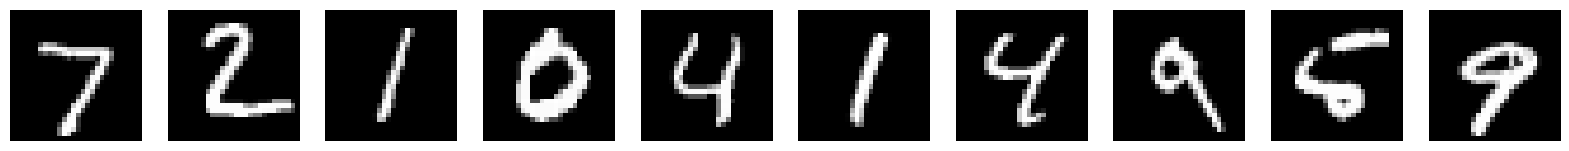

In [20]:
# Display original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')


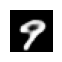

In [23]:
# display reconstruction
ax = plt.subplot(2, n, i + 1 + n)
plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()